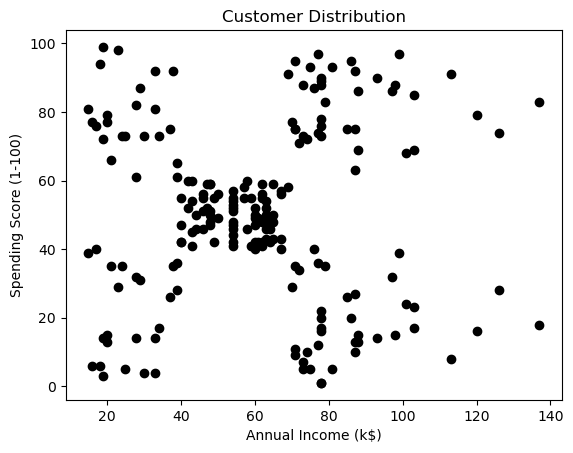

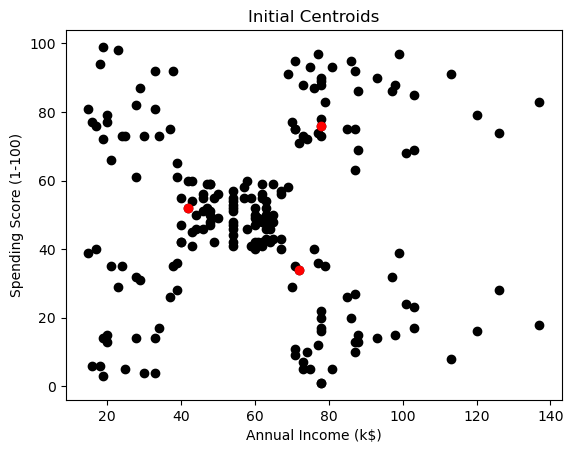

Difference: 3.7715957025011946
Difference: 2.3558018418824105
Difference: 0.16105049208387356
Difference: 0.0


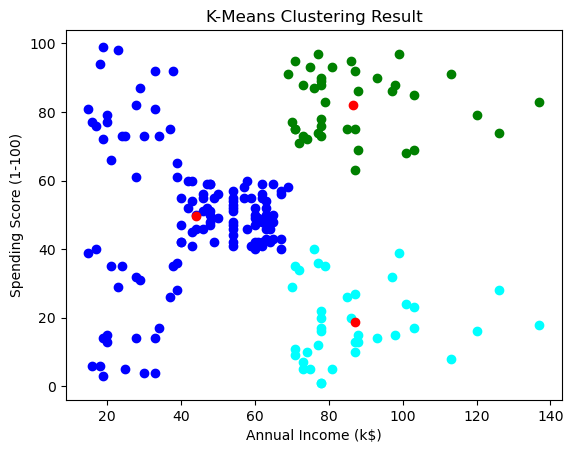

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Mall_Customers.csv')


X = data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()


plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()


K = 3
Centroids = X.sample(n=K)

# Plot initial centroids
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Initial Centroids')
plt.show()


diff = 1
j = 0

while diff != 0:
    XD = X.copy()
    i = 1
    for _, row_c in Centroids.iterrows():
        ED = []
        for _, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"])**2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X.loc[:, i] = ED  # Use .loc to avoid SettingWithCopyWarning
        i += 1

    C = []
    for _, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    
    X["Cluster"] = C
    Centroids_new = X.groupby("Cluster").mean()[["Annual Income (k$)", "Spending Score (1-100)"]]

    if j == 0:
        diff = 1
        j += 1
    else:
        diff = (Centroids_new["Annual Income (k$)"] - Centroids["Annual Income (k$)"]).sum() + \
               (Centroids_new["Spending Score (1-100)"] - Centroids["Spending Score (1-100)"]).sum()
        print("Difference:", diff.sum())

    Centroids = Centroids_new

colors = ['blue', 'green', 'cyan']
for k in range(K):
    data_cluster = X[X["Cluster"] == k+1]
    plt.scatter(data_cluster["Annual Income (k$)"], data_cluster["Spending Score (1-100)"], c=colors[k])
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Result')
plt.show()
